In [20]:
import numpy as np
import mne
%matplotlib qt

In [21]:
## Creating artificial signal
sampling_freq = 200
times = np.linspace(0, 1, sampling_freq, endpoint=False)
sine = 20*np.sin(50 * np.pi * times )*1e-6
cosine = 20*np.cos(24 * np.pi * times ) *1e-6
added = [sine+cosine]*50
sines = [sine]*50
cosines = [cosine]*50
data = np.array([np.concatenate(added), np.concatenate(sines), np.concatenate(cosines)])

## Creating raw mne object
# Fake sensor locations and montage
psenloc = []
psenloc.append(np.array([0, 0, 0]))
psenloc.append(np.array([0, 2, 0]))
psenloc.append(np.array([0, 4, 0]))
psenloc = np.array(psenloc)
ch_names = ['Added signal','25Hz Sine','12Hz Cosine']
SensorLoc = dict(zip(ch_names, psenloc.tolist()))
montage = mne.channels.make_dig_montage(ch_pos=SensorLoc, coord_frame='head')
# Info
info = mne.create_info(ch_names=ch_names, ch_types=["eeg"]*3, sfreq=sampling_freq)
info.set_montage(montage)
# Simulated raw data
simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)

Creating RawArray with float64 data, n_channels=3, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.


In [22]:
## Creating epochs
epochs = mne.make_fixed_length_epochs(simulated_raw, duration=1.1, preload=False)

# Modify duration to:
# 1.0 time- and phase-locked signal
# 1.1 attenuate both, remove 12Hz Cosine
# 1.2 attenuate 12Hz Cosine
# 1.3 attenuate both, remove 25Hz Sine
# 1.4 for remove 12Hz Cosine
# 1.5 attenuate 25Hz Sine
# 1.6 attenuate 12Hz Cosine
# 1.7 attenuate both

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated


In [23]:
## Plotting Epochs - interactive plot
epochs.plot()

Using data from preloaded Raw for 45 events and 220 original time points ...
0 bad epochs dropped


C:\Users\andresfs\AppData\Local\Temp\ipykernel_42764\1913462288.py:2: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  epochs.plot()


Using data from preloaded Raw for 20 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 4 events and 220 original time points ...
Using data from preloaded Raw for 9 events and 220 original time points ...
Using data from preloaded Raw for 20 events and 220 original time points ...
Using data from preloaded Raw for 20 events and 220 original time points ...


In [24]:
## Averaging epochs 
average = epochs.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


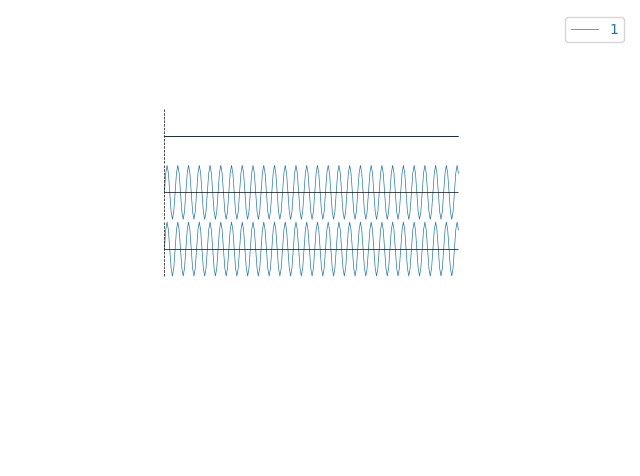

In [25]:
## Plot the averages, all channels - interactive plot
average.plot_topo()

NOTE: plot_psd_topo() is a legacy function. New code should use .compute_psd().plot_topo().
    Using multitaper spectrum estimation with 7 DPSS windows


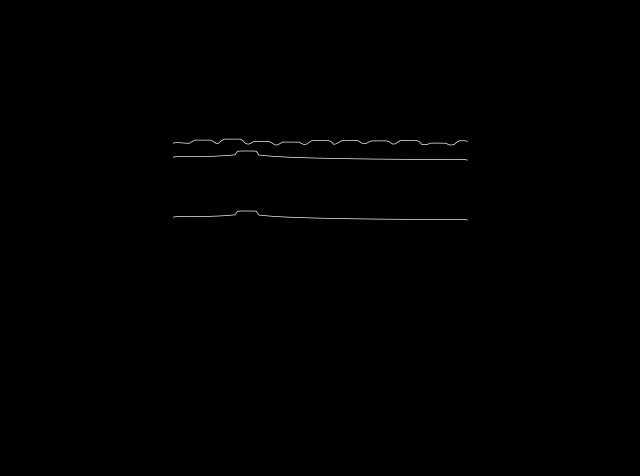

In [26]:
## Plot PSD of the averaged, all channels - interactive plot
average.plot_psd_topo()

In [27]:
## Time-Frequency (TF) Decomposition using Morlet Wavelet
freqs = np.arange(1, 40)
n_cycles = freqs / 2.0
tfr_epochs= mne.time_frequency.tfr_morlet(average, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=4, average=False) # TF of the averaged
# tfr_epochs= mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=4, average=False) # TF of each epoch


Not setting metadata


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished


In [28]:
## Plot TF per channel
for channel in ch_names:
    tfr_epochs.copy().average().plot(picks=channel,mode='mean',baseline=None, cmap='jet',title=channel)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


No baseline correction applied


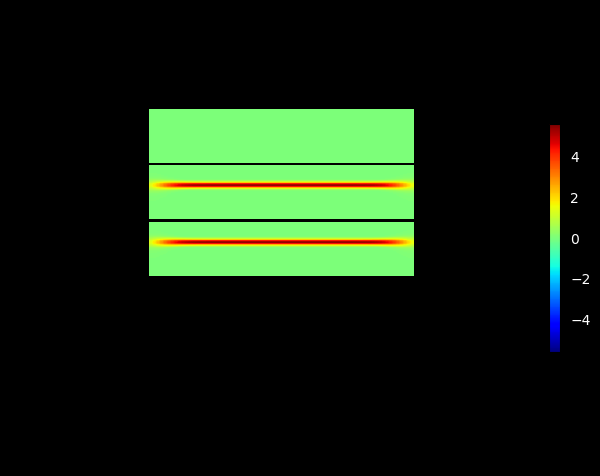

In [29]:
## Plot TF all channels - interactive plot
tfr_epochs.copy().average().plot_topo(mode='mean',baseline=None, cmap='jet')

### Part 2, Intermitent Signal

In [30]:
## Creating artificial signals
sampling_freq2 = 200
times2 = np.linspace(0, 0.5, int(sampling_freq2/2), endpoint=False)
# sine2 = 20*np.sin(50 * np.pi * times2 )*1e-6 
sine2 = 10*np.sin(50 * np.pi * times2 )*1e-6 #Intermitent signal with half amplitude
cosine2 = 20*np.cos(24 * np.pi * times2 ) *1e-6
zeros = np.zeros((times2.shape))
cosines2 = [cosine2]*100

#Intermitent signal
signal = []
for i in range(0,100):
    n = np.random.randint(0,10)
    if n>4:
        signal.append(sine2)
    else:
        signal.append(zeros)

signal = np.concatenate(signal)
cosines2 = np.concatenate(cosines2)
data2 = np.array([signal+cosines2,  signal,cosines2])
 

In [31]:
## Creating raw mne object

# Fake sensor locations and montage
psenloc = []
psenloc.append(np.array([0, 0, 0]))
psenloc.append(np.array([0, 2, 0]))
psenloc.append(np.array([0, 4, 0]))
psenloc = np.array(psenloc)
ch_names2 = ['Added signal','25Hz Sine Intermitent','12Hz Cosine']
SensorLoc2 = dict(zip(ch_names2, psenloc.tolist()))
montage2 = mne.channels.make_dig_montage(ch_pos=SensorLoc2, coord_frame='head')

# Info
info2 = mne.create_info(ch_names=ch_names2, ch_types=["eeg"]*3, sfreq=sampling_freq2)
info2.set_montage(montage2)

# Simulated raw data
simulated_raw2 = mne.io.RawArray(data2, info2)
simulated_raw2.plot(show_scrollbars=False, show_scalebars=False)

Creating RawArray with float64 data, n_channels=3, n_times=10000
    Range : 0 ... 9999 =      0.000 ...    49.995 secs
Ready.


In [32]:
## Creating epochs
epochs2 = mne.make_fixed_length_epochs(simulated_raw2, duration=2, preload=False)

Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated


In [33]:
## Averaging epochs
average2 = epochs2.average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


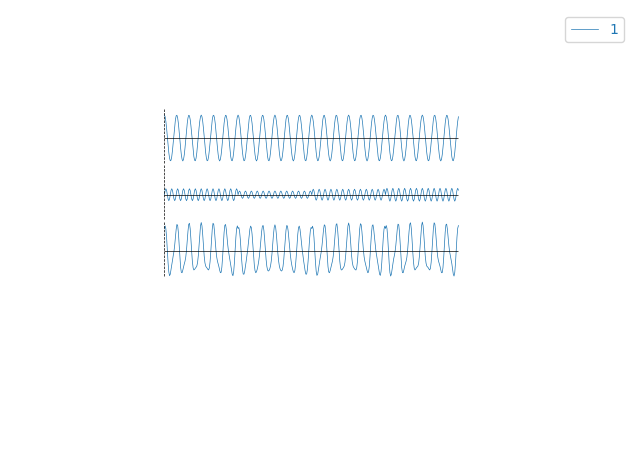

In [34]:
## Plot the averages, all channels - interactive plot
average2.plot_topo()

NOTE: plot_psd_topo() is a legacy function. New code should use .compute_psd().plot_topo().
    Using multitaper spectrum estimation with 7 DPSS windows


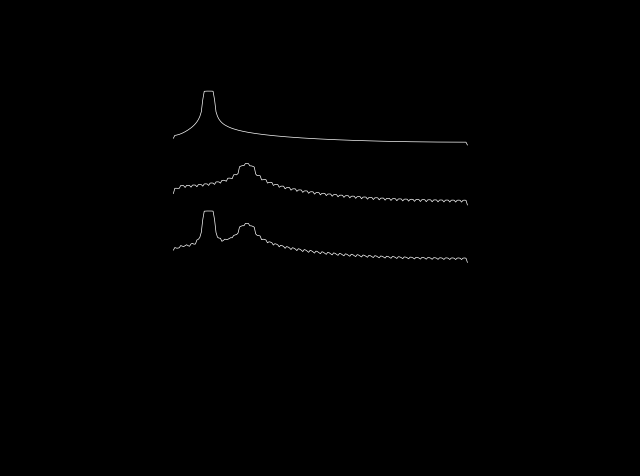

In [35]:
## Plot PSD of the averaged, all channels - interactive plot
average2.plot_psd_topo()

In [36]:
## Time-Frequency (TF) Decomposition using Morlet Wavelet
freqs = np.arange(1, 40)
n_cycles = freqs / 2.0 
tfr_epochs2= mne.time_frequency.tfr_morlet(average2, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=4, average=False) # TF of the averaged
# tfr_epochs2= mne.time_frequency.tfr_morlet(epochs2, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False, decim=3, n_jobs=4, average=False) # TF of each epoch


Not setting metadata


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.0s finished


In [37]:
## Plot TF per channel
for channel in ch_names2:
    tfr_epochs2.copy().average().plot(picks=channel,mode='mean',baseline=None, cmap='jet',title=channel)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


No baseline correction applied


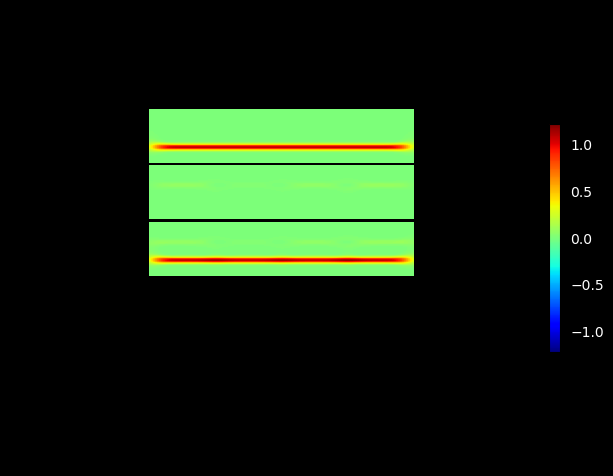

: 

In [38]:
## Plot TF all channels - interactive plot
tfr_epochs2.copy().average().plot_topo(mode='mean',baseline=None, cmap='jet')